In [2]:
import pandas as pd



PATH = 'distorted-images/distorted-images-data.csv'

df = pd.read_csv(PATH, sep=';', header=0)

print(df.head())
print(df.info())

,Unnamed: 0,FILE_PATH,ORIG_CLASSES,GAUSS_SSIM,GAUSS_CLASSES,BLUR_SSIM,BLUR_CLASSES,GRAYSCALE_SSIM,GRAYSCALE_CLASSES,NEGATIVE_SSIM,NEGATIVE_CLASSES,ZOOM_SSIM,ZOOM_CLASSES
0,0,train/n01440764/n01440764_9973.JPEG,"[('tench', 0.99995816), ('barracouta', 3.81343...",41.455644,"[('ear', 0.6792256), ('corn', 0.17231393), ('m...",36.409702,"[('tench', 0.9991404), ('barracouta', 0.000447...",89.779989,"[('tench', 0.45524022), ('rugby_ball', 0.13772...",-65.666984,"[('feather_boa', 0.15323886), ('fountain', 0.0...",6.820013,"[('tench', 0.99999726), ('barracouta', 2.12975..."
1,1,train/n01440764/n01440764_9966.JPEG,"[('tench', 0.9990964), ('barracouta', 0.000624...",34.840663,"[('tench', 0.9758381), ('ice_bear', 0.00540244...",58.469693,"[('tench', 0.9994134), ('barracouta', 0.000455...",89.273303,"[('tench', 0.99681574), ('barracouta', 0.00255...",-41.838226,"[('feather_boa', 0.58066756), ('puffer', 0.122...",18.479007,"[('tench', 0.99779606), ('barracouta', 0.00156..."
2,2,train/n01440764/n01440764_9939.JPEG,"[('tench', 0.99539244), ('barracouta', 0.00374...",30.397566,"[('tench', 0.7433534), ('coho', 0.07655524), (...",55.981873,"[('tench', 0.9913395), ('barracouta', 0.005830...",96.701168,"[('coho', 0.7799943), ('barracouta', 0.1111239...",-65.368578,"[('altar', 0.1333515), ('fountain', 0.12121655...",9.447988,"[('tench', 0.99992573), ('barracouta', 5.71205..."
3,3,train/n01440764/n01440764_993.JPEG,"[('tench', 0.781498), ('barracouta', 0.1264197...",29.745351,"[('malamute', 0.096755415), ('jigsaw_puzzle', ...",44.806484,"[('tench', 0.25705686), ('mountain_tent', 0.22...",94.308704,"[('reel', 0.351939), ('hatchet', 0.07186679), ...",-55.509888,"[('breastplate', 0.7899315), ('mask', 0.068318...",7.011931,"[('tench', 0.989679), ('barracouta', 0.0082289..."
4,4,train/n01440764/n01440764_9929.JPEG,"[('tench', 0.99897134), ('barracouta', 0.00030...",26.811492,"[('tench', 0.49384516), ('electric_ray', 0.117...",51.496377,"[('tench', 0.84061205), ('mongoose', 0.0241485...",97.211849,"[('tench', 0.9866846), ('armadillo', 0.0031071...",-62.153875,"[('platypus', 0.3637657), ('badger', 0.1802868...",13.714600,"[('tench', 0.99983716), ('barracouta', 0.00011..."


Média da precisão de todos os resultados: 0.56
True labels: ['tench' 'coho' 'gar' 'barracouta' 'bow' 'Dutch_oven' 'hen-of-the-woods'
 'strainer' 'coral_reef' 'sleeping_bag' 'beaver' 'sturgeon'
 'Dungeness_crab' 'slug' 'American_lobster' 'swing' 'apiary' 'barrow'
 'eel' 'axolotl' 'swimming_trunks' 'drum' 'scuba_diver' 'black_widow'
 'reel' 'gong' 'goldfish' 'beagle' 'bonnet' 'artichoke' 'bolete' 'bittern'
 'mushroom' 'wombat' 'platypus' 'coil' 'sea_lion' 'jackfruit' 'crayfish'
 'water_buffalo' 'chiton' 'conch']
Predicted labels: ['1' '0']
Média da F1-Score de todas as comparações: 0.00
Precisão de todas as comparações: 0.95
Classe com maior precisão: [('tench', np.float32(0.68591356)), ('puffer', np.float32(0.15413778)), ('eel', np.float32(0.061888076)), ('rock_beauty', np.float32(0.051695954)), ('coral_reef', np.float32(0.018104376))] (1.00)
Classe com menor precisão: [('Dutch_oven', np.float32(0.20044866)), ('tench', np.float32(0.14517713)), ('barrow', np.float32(0.059471738)), ('Labr

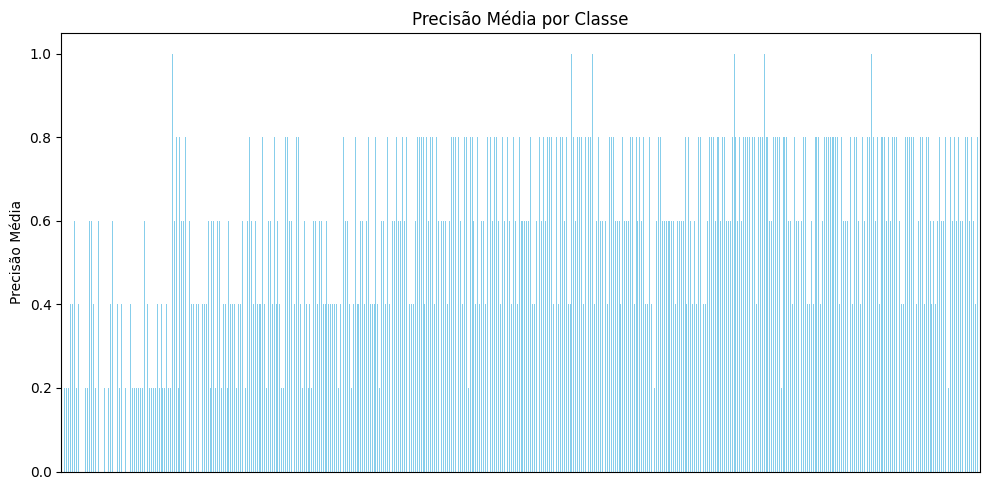

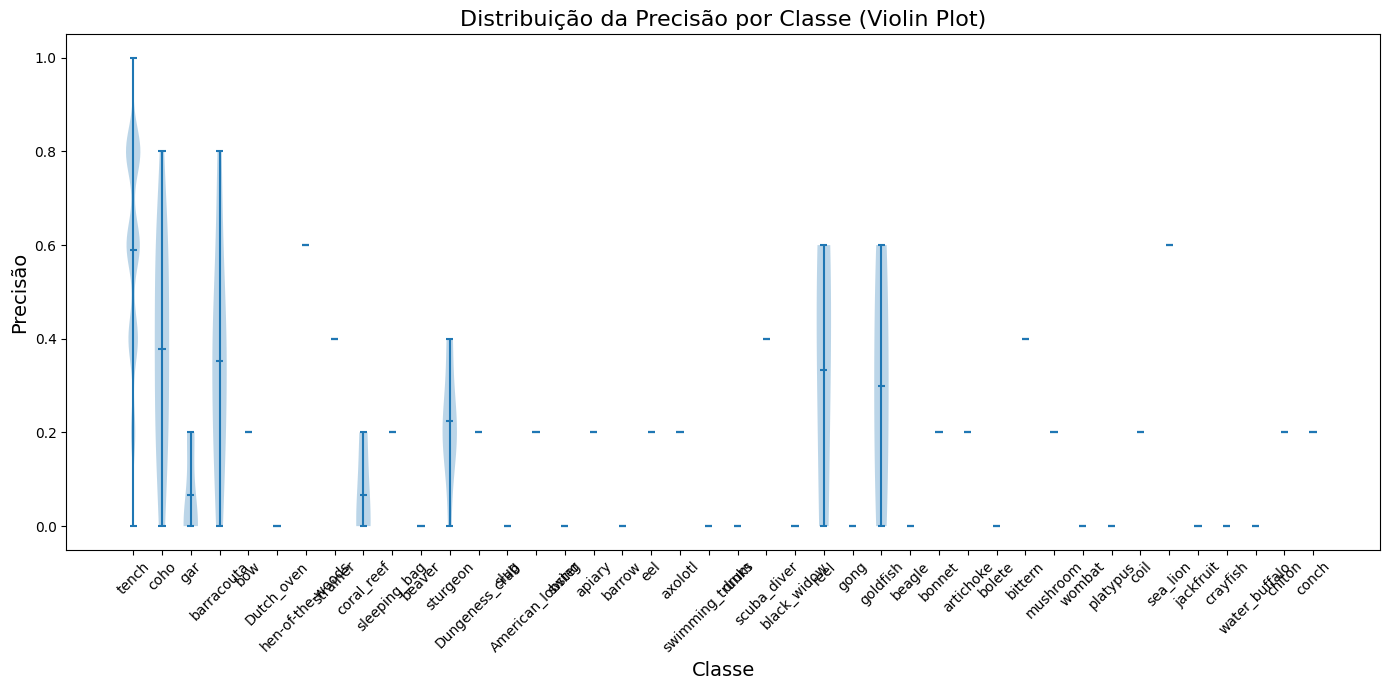

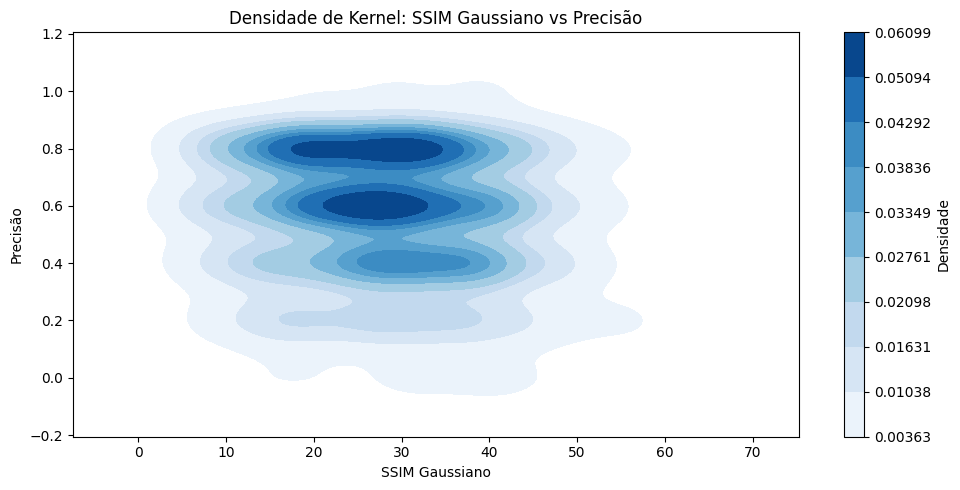

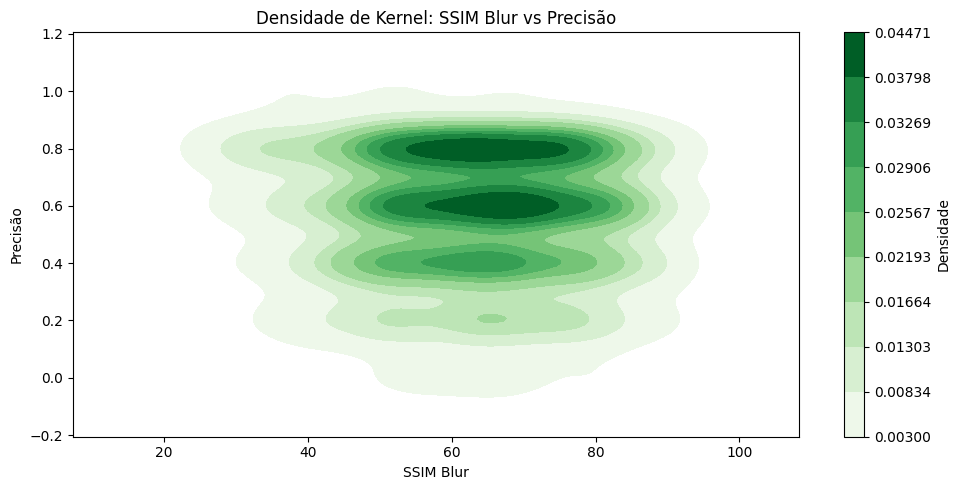

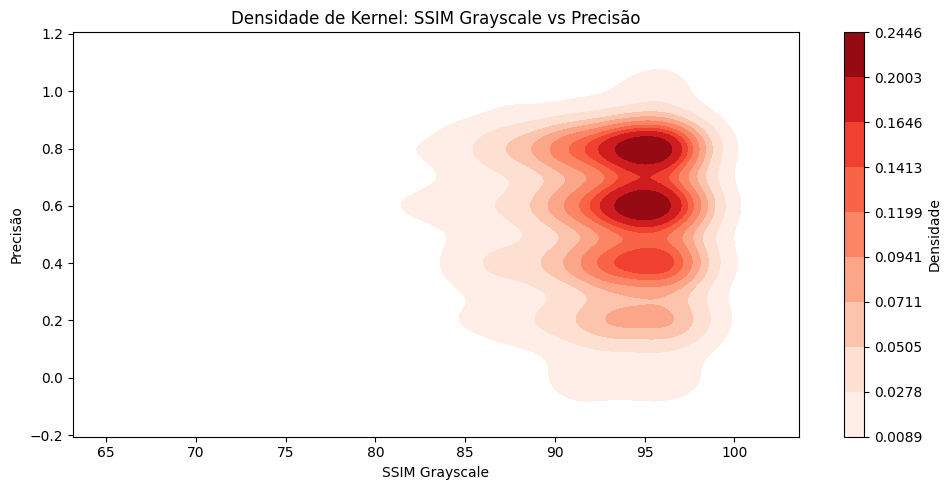

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score
import numpy as np
import seaborn as sns

df = pd.read_csv("distorted-images/distorted-images-data.csv", sep=";")
df = df.rename(columns={"ORIG_CLASSES": "CLASS", "TOP_1_ACCURACYMEAN_CONFIDENCE_DROP": "TOP1_ACCURACY"})

if "CLASS" not in df.columns or "TOP1_ACCURACY" not in df.columns:
    print("Erro: As colunas 'CLASS' e 'TOP1_ACCURACY' não estão no DataFrame.")
else:
    mean_accuracy = df["TOP1_ACCURACY"].mean()
    print(f"Média da precisão de todos os resultados: {mean_accuracy:.2f}")

    true_labels = df["CLASS"].apply(lambda x: eval(x, {"np": np})[0][0])
    predicted_labels = df["TOP1_ACCURACY"].apply(lambda x: '1' if x > 0.5 else '0')

    print(f"True labels: {true_labels.unique()}")
    print(f"Predicted labels: {predicted_labels.unique()}")

    mean_f1_score = f1_score(true_labels, predicted_labels, average='macro', zero_division=1)
    print(f"Média da F1-Score de todas as comparações: {mean_f1_score:.2f}")

    precision = precision_score(true_labels, predicted_labels, average='macro', zero_division=1)
    print(f"Precisão de todas as comparações: {precision:.2f}")

    accuracy_by_class = df.groupby("CLASS")["TOP1_ACCURACY"].mean()

    max_accuracy_class = accuracy_by_class.idxmax()
    min_accuracy_class = accuracy_by_class.idxmin()

    print(f"Classe com maior precisão: {max_accuracy_class} ({accuracy_by_class[max_accuracy_class]:.2f})")
    print(f"Classe com menor precisão: {min_accuracy_class} ({accuracy_by_class[min_accuracy_class]:.2f})")

    # Gráfico de Barras
    plt.figure(figsize=(10, 5))
    accuracy_by_class.plot(kind='bar', color='skyblue')
    plt.title('Precisão Média por Classe')
    plt.ylabel('Precisão Média')
    plt.gca().axes.get_xaxis().set_visible(False)  # Oculta o eixo X
    plt.tight_layout()
    plt.show()

    # Gráfico de Violino
    df["CLASS"] = df["CLASS"].apply(lambda x: eval(x, {"np": np})[0][0])
    df["TOP1_ACCURACY"] = df["TOP1_ACCURACY"].astype(float)

    violin_data = [df[df["CLASS"] == cls]["TOP1_ACCURACY"].dropna() for cls in df["CLASS"].unique()]

    plt.figure(figsize=(14, 7))
    plt.violinplot(violin_data, showmeans=True)
    plt.title('Distribuição da Precisão por Classe (Violin Plot)', fontsize=16)
    plt.xlabel('Classe', fontsize=14)
    plt.ylabel('Precisão', fontsize=14)
    plt.xticks(ticks=range(1, len(df["CLASS"].unique()) + 1), labels=df["CLASS"].unique(), rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

    # Gráfico de Densidade de Kernel para SSIM Gaussiano vs Precisão
    plt.figure(figsize=(10, 5))
    kde = sns.kdeplot(x=df["GAUSS_SSIM"], y=df["TOP1_ACCURACY"], fill=True, cmap="Blues")
    plt.title('Densidade de Kernel: SSIM Gaussiano vs Precisão')
    plt.xlabel('SSIM Gaussiano')
    plt.ylabel('Precisão')
    plt.colorbar(kde.collections[0], label='Densidade')
    plt.tight_layout()
    plt.show()

    # Gráfico de Densidade de Kernel para SSIM Blur vs Precisão
    plt.figure(figsize=(10, 5))
    kde = sns.kdeplot(x=df["BLUR_SSIM"], y=df["TOP1_ACCURACY"], fill=True, cmap="Greens")
    plt.title('Densidade de Kernel: SSIM Blur vs Precisão')
    plt.xlabel('SSIM Blur')
    plt.ylabel('Precisão')
    plt.colorbar(kde.collections[0], label='Densidade')
    plt.tight_layout()
    plt.show()

    # Gráfico de Densidade de Kernel para SSIM Grayscale vs Precisão
    plt.figure(figsize=(10, 5))
    kde = sns.kdeplot(x=df["GRAYSCALE_SSIM"], y=df["TOP1_ACCURACY"], fill=True, cmap="Reds")
    plt.title('Densidade de Kernel: SSIM Grayscale vs Precisão')
    plt.xlabel('SSIM Grayscale')
    plt.ylabel('Precisão')
    plt.colorbar(kde.collections[0], label='Densidade')
    plt.tight_layout()
    plt.show()